In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Loading the data

In [2]:
path    = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df = pd.read_csv(filepath_or_buffer=path, names=headers)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Analyzing the data

In [4]:
#its shape
df.shape

(205, 26)

In [5]:
#to obtain the main info from the data we can use the .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
#we can use the df.describe() method to obtain some statistics about our data
#by default it will only give us information of the numeric columns
#if we want statistics about all columns we use the paramerter include="all"
df.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [7]:
#only those columns with dtype "object"
df.describe(include=object)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [8]:
#We can see that for "normalized-losses" the dtype should be an integer, and so for other columns of type object. 
#lets see the unique values for each column
for column in df.select_dtypes(include=object).columns:
    print(column)
    print("has ? =",('?' in df[column].unique()))
    print(df[column].unique())
    print("")
#df.select_dtypes(include=object)['normalized-losses'].unique()

normalized-losses
has ? = True
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

make
has ? = False
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel-type
has ? = False
['gas' 'diesel']

aspiration
has ? = False
['std' 'turbo']

num-of-doors
has ? = True
['two' 'four' '?']

body-style
has ? = False
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive-wheels
has ? = False
['rwd' 'fwd' '4wd']

engine-location
has ? = False
['front' 'rear']

engine-type
has ? = False
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

num-of-cylinders
has ? = False
['four' 'six' '

In [9]:
#as said before, there are many columns which should be a numeric type but are an object type.
#lets start to fix this
#almost all the columns with ? should be numeric, so, lets replace ? for a np.nan
df2 = df.replace(to_replace='?', value=np.nan)
df2.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


In [10]:
#and now, the info() gives us
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
df2.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [12]:
#and the columns that should only numerical are
left = df2.describe(include=object).loc["count"]<205
df2[left.index[left.values]].describe()

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price
count,164,203,201,201,203,203,201
unique,51,2,38,36,59,23,186
top,161,four,3.62,3.40,68,5500,7898
freq,11,114,23,20,19,37,2


In [13]:
df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Filling/deleting the missing data

In [14]:
#Here the number of missing values and how to replace them:
#For normalized-losses the are missing 205-164=41 cells -> mean
#For num-doors 205-203=2 -> mode
#For bore 4 -> mean
#For stroke 4 -> mean
#For horsepower 2 -> mean
#For peak-rpm 2 -> mean
#And for price 4 -> delete?

In [15]:
#Replacing the nan values
#df2.fillna(value={"normalized-losses": df2["normalized-losses"].astype(dtype=float).mean()}, inplace=True)
#df2["normalized-losses"] = df2["normalized-losses"].astype(float)
df2["normalized-losses"].replace(to_replace=np.nan, value=df2["normalized-losses"].astype(dtype=np.float).mean(), inplace=True)
df2["num-of-doors"].replace(to_replace=np.nan, value=df["num-of-doors"].mode()[0])
df2["bore"].replace(to_replace=np.nan, value=df2["bore"].astype(np.float).mean(), inplace=True)
df2["stroke"].replace(to_replace=np.nan, value=df2["stroke"].astype(np.float).mean(), inplace=True)
df2["horsepower"].replace(to_replace=np.nan, value=df2["horsepower"].astype(np.float).mean(), inplace=True)
df2["peak-rpm"].replace(to_replace=np.nan, value=df2["peak-rpm"].astype(np.float).mean(), inplace=True)

In [16]:
df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [18]:
#There is one last column to fix; the price column. For this one we are going to delete the 205-201=4 cells
#for which we do not have a value
df2.dropna(subset=["price"], axis=0, inplace=True)

In [19]:
df2.reset_index(drop=True, inplace=True)
df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [20]:
#Now we do not have 205 rows, we have 201
df2.shape

(201, 26)

# Dtypes

In [21]:
#And now we are going to give each column the correct dtype by using the astype() method
df2.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [22]:
df_clean = df2.copy()
df_clean

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [23]:
df_clean[["normalized-losses", "horsepower"]] = df_clean[["normalized-losses", "horsepower"]].astype(dtype=np.int)
df_clean[["peak-rpm", "price", "bore", "stroke"]] = df_clean[["peak-rpm", "price", "bore", "stroke"]].astype(dtype=np.float)

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

# Bined data

In [25]:
#Sometimes we would like to group the data by bines, we can use the df.cut() method
#for intance, lets bin the horsepower of each car in low, midium and hight

In [26]:
df_clean["horsepower"][df_clean["horsepower"].isna()]

Series([], Name: horsepower, dtype: int64)

In [27]:
#creating the bines
bins = np.linspace(df_clean["horsepower"].min(), df_clean["horsepower"].max(), 4)
bin_names = ["low", "midium", "height"]
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [28]:
#and now lets add the horsepower_bin column
horsepower_bin = pd.cut(x=df_clean["horsepower"], bins=bins, labels=bin_names, include_lowest=True)
df_clean["horsepower_bin"] = horsepower_bin
df_clean

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_bin
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,midium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,low
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0,midium
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0,midium
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0,low


In [29]:
df_clean["horsepower_bin"].value_counts()

low       153
midium     43
height      5
Name: horsepower_bin, dtype: int64

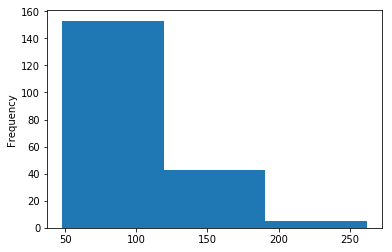

In [30]:
df_clean["horsepower"].plot(kind="hist", bins=3)

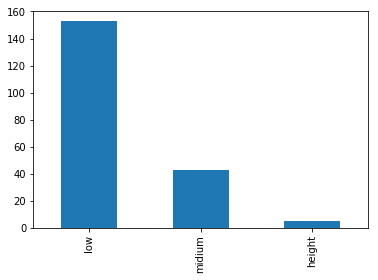

In [31]:
#or
df_clean["horsepower_bin"].value_counts().plot(kind="bar")

# Grouping the data

In [32]:
#with pandas we can also group the data according to the criteria we want by using the df.groupby(by=) function
group = df_clean.groupby(by=["make", "num-of-doors"]) 
group

In [34]:
#with group.groups we can see the groups that were created and their elements
group.groups

{('alfa-romero', 'two'): [0, 1, 2], ('audi', 'four'): [3, 4, 6, 7, 8], ('audi', 'two'): [5], ('bmw', 'two'): [9, 11, 15], ('bmw', 'four'): [10, 12, 13, 14, 16], ('chevrolet', 'two'): [17, 18], ('chevrolet', 'four'): [19], ('dodge', 'two'): [20, 21, 22, 28], ('dodge', 'four'): [23, 24, 25, 27], ('dodge', nan): [26], ('honda', 'two'): [29, 30, 31, 32, 33, 36, 37, 41], ('honda', 'four'): [34, 35, 38, 39, 40], ('isuzu', 'four'): [42], ('isuzu', 'two'): [43], ('jaguar', 'four'): [44, 45], ('jaguar', 'two'): [46], ('mazda', 'two'): [47, 48, 49, 52, 53, 54, 55, 56, 58], ('mazda', 'four'): [50, 51, 57, 59, 61, 62, 63], ('mazda', nan): [60], ('mercedes-benz', 'four'): [64, 65, 67, 68, 70], ('mercedes-benz', 'two'): [66, 69, 71], ('mercury', 'two'): [72], ('mitsubishi', 'two'): [73, 74, 75, 76, 77, 78, 79, 80, 81], ('mitsubishi', 'four'): [82, 83, 84, 85], ('nissan', 'two'): [86, 87, 88, 91, 92, 95, 101, 102, 103], ('nissan', 'four'): [89, 90, 93, 94, 96, 97, 98, 99, 100], ('peugot', 'four'): [1

In [35]:
#we can also use group.indeces 
group.indices

{('mazda', 'two'): array([47, 48, 49, 52, 53, 54, 55, 56, 58]),
 ('alfa-romero', 'two'): array([0, 1, 2]),
 ('audi', 'four'): array([3, 4, 6, 7, 8]),
 ('audi', 'two'): array([5]),
 ('bmw', 'four'): array([10, 12, 13, 14, 16]),
 ('bmw', 'two'): array([ 9, 11, 15]),
 ('chevrolet', 'four'): array([19]),
 ('chevrolet', 'two'): array([17, 18]),
 ('dodge', 'four'): array([23, 24, 25, 27]),
 ('dodge', 'two'): array([20, 21, 22, 28]),
 ('honda', 'four'): array([34, 35, 38, 39, 40]),
 ('honda', 'two'): array([29, 30, 31, 32, 33, 36, 37, 41]),
 ('isuzu', 'four'): array([42]),
 ('isuzu', 'two'): array([43]),
 ('jaguar', 'four'): array([44, 45]),
 ('jaguar', 'two'): array([46]),
 ('mazda', 'four'): array([50, 51, 57, 59, 61, 62, 63]),
 ('mercedes-benz', 'four'): array([64, 65, 67, 68, 70]),
 ('mercedes-benz', 'two'): array([66, 69, 71]),
 ('mercury', 'two'): array([72]),
 ('mitsubishi', 'four'): array([82, 83, 84, 85]),
 ('mitsubishi', 'two'): array([73, 74, 75, 76, 77, 78, 79, 80, 81]),
 ('nissan

In [37]:
#if we just wanna see their names we use group.groups.keys()
group.groups.keys()

dict_keys([('alfa-romero', 'two'), ('audi', 'four'), ('audi', 'two'), ('bmw', 'two'), ('bmw', 'four'), ('chevrolet', 'two'), ('chevrolet', 'four'), ('dodge', 'two'), ('dodge', 'four'), ('dodge', nan), ('honda', 'two'), ('honda', 'four'), ('isuzu', 'four'), ('isuzu', 'two'), ('jaguar', 'four'), ('jaguar', 'two'), ('mazda', 'two'), ('mazda', 'four'), ('mazda', nan), ('mercedes-benz', 'four'), ('mercedes-benz', 'two'), ('mercury', 'two'), ('mitsubishi', 'two'), ('mitsubishi', 'four'), ('nissan', 'two'), ('nissan', 'four'), ('peugot', 'four'), ('plymouth', 'two'), ('plymouth', 'four'), ('porsche', 'two'), ('renault', 'four'), ('renault', 'two'), ('saab', 'two'), ('saab', 'four'), ('subaru', 'two'), ('subaru', 'four'), ('toyota', 'two'), ('toyota', 'four'), ('volkswagen', 'two'), ('volkswagen', 'four'), ('volvo', 'four')])

In [38]:
#and if we just wanna see their values we use group.groups.values()
group.groups.values()

dict_values([Int64Index([0, 1, 2], dtype='int64'), Int64Index([3, 4, 6, 7, 8], dtype='int64'), Int64Index([5], dtype='int64'), Int64Index([9, 11, 15], dtype='int64'), Int64Index([10, 12, 13, 14, 16], dtype='int64'), Int64Index([17, 18], dtype='int64'), Int64Index([19], dtype='int64'), Int64Index([20, 21, 22, 28], dtype='int64'), Int64Index([23, 24, 25, 27], dtype='int64'), Int64Index([26], dtype='int64'), Int64Index([29, 30, 31, 32, 33, 36, 37, 41], dtype='int64'), Int64Index([34, 35, 38, 39, 40], dtype='int64'), Int64Index([42], dtype='int64'), Int64Index([43], dtype='int64'), Int64Index([44, 45], dtype='int64'), Int64Index([46], dtype='int64'), Int64Index([47, 48, 49, 52, 53, 54, 55, 56, 58], dtype='int64'), Int64Index([50, 51, 57, 59, 61, 62, 63], dtype='int64'), Int64Index([60], dtype='int64'), Int64Index([64, 65, 67, 68, 70], dtype='int64'), Int64Index([66, 69, 71], dtype='int64'), Int64Index([72], dtype='int64'), Int64Index([73, 74, 75, 76, 77, 78, 79, 80, 81], dtype='int64'), In

In [40]:
#to see a specific group we use its name with group.get_group(name=)
#for intancethe group ('peugot', 'four') will give us only those elements in the data that are make=peugot and have num_of_doors=four
group.get_group(name=('peugot', 'four'))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_bin
104,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,mpfi,3.46,3.19,8.4,97,5000.0,19,24,11900.0,low
105,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95,4150.0,28,33,13200.0,low
106,0,122,peugot,gas,std,four,wagon,rwd,front,114.2,...,mpfi,3.46,3.19,8.4,97,5000.0,19,24,12440.0,low
107,0,122,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,idi,3.70,3.52,21.0,95,4150.0,25,25,13860.0,low
108,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,mpfi,3.46,2.19,8.4,95,5000.0,19,24,15580.0,low
109,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95,4150.0,28,33,16900.0,low
110,0,122,peugot,gas,std,four,wagon,rwd,front,114.2,...,mpfi,3.46,2.19,8.4,95,5000.0,19,24,16695.0,low
111,0,122,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,idi,3.70,3.52,21.0,95,4150.0,25,25,17075.0,low
112,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,mpfi,3.46,3.19,8.4,97,5000.0,19,24,16630.0,low
113,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,idi,3.70,3.52,21.0,95,4150.0,28,33,17950.0,low


In [45]:
#we can obtain some statistics from the groups:
#group.mean()[["symboling", "horsepower"]]
group.mean()

symboling  normalized-losses  wheel-base  \
make          num-of-doors                                             
alfa-romero   two            2.333333         122.000000   90.566667   
audi          four           1.400000         153.200000  103.320000   
              two            2.000000         122.000000   99.800000   
bmw           four           0.200000         149.200000  103.880000   
              two            0.666667         167.333333  101.966667   
chevrolet     four           0.000000          81.000000   94.500000   
              two            1.500000         109.500000   91.450000   
dodge         four           0.500000         138.500000   96.100000   
              two            1.500000         124.750000   94.250000   
honda         four           0.000000          88.600000   96.500000   
              two            1.000000         112.000000   92.975000   
isuzu         four           0.000000         122.000000   94.300000   
              two            2.000000         122.000000   96.000000   
jaguar        four           0.000000         133.500000  113.000000   
              two            0.000000         122.000000  102.000000   
mazda         four           0.285714         115.857143   98.914286   
              two            1.888889         130.000000   95.344444   
mercedes-benz four          -0.800000         104.600000  114.420000   
              two            1.333333         119.000000  105.100000   
mercury       two            1.000000         122.000000  102.700000   
mitsubishi    four           0.500000         128.000000   96.300000   
              two            2.444444         146.222222   94.933333   
nissan        four           0.444444         111.777778   97.066667   
              two            1.555556         158.555556   94.377778   
peugot        four           0.000000         146.818182  110.200000   
plymouth      four           0.500000         134.000000   96.100000   
              two            1.666667         120.000000   94.433333   
porsche       two            3.000000         138.000000   90.750000   
renault       four           0.000000         122.000000   96.100000   
              two            2.000000         122.000000   96.100000   
saab          four           2.000000         104.000000   99.100000   
              two            3.000000         150.000000   99.100000   
subaru        four           0.000000          95.333333   97.044444   
              two            2.000000          83.000000   93.566667   
toyota        four          -0.333333          83.166667   98.538889   
              two            1.714286         146.000000   97.542857   
volkswagen    four           1.250000         104.500000   98.462500   
              two            2.500000         155.500000   95.900000   
volvo         four          -1.272727          91.454545  106.481818   

                                length      width     height  curb-weight  \
make          num-of-doors                                                  
alfa-romero   two           169.600000  64.566667  50.000000  2639.666667   
audi          four          186.260000  69.360000  55.180000  2809.000000   
              two           177.300000  66.300000  53.100000  2507.000000   
bmw           four          185.720000  66.860000  55.260000  2990.000000   
              two           182.466667  65.833333  54.100000  2828.333333   
chevrolet     four          158.800000  63.600000  52.000000  1909.000000   
              two           148.500000  61.950000  52.600000  1681.000000   
dodge         four          161.625000  64.000000  52.900000  2120.000000   
              two           161.275000  64.425000  50.650000  2172.750000   
honda         four          169.340000  64.160000  55.020000  2235.000000   
              two           155.412500  64.525000  52.125000  2010.375000   
isuzu         four          170.700000  61.800000  53.500000  2337.000000 

In [49]:
group.std()

symboling  normalized-losses  wheel-base  \
make          num-of-doors                                             
alfa-romero   two            1.154701           0.000000    3.406367   
audi          four           0.547723          17.697457    3.398823   
              two                 NaN                NaN         NaN   
bmw           four           0.447214          37.271973    3.609294   
              two            1.154701          39.310728    1.327906   
chevrolet     four                NaN                NaN         NaN   
              two            0.707107          16.263456    4.313351   
dodge         four           1.000000          19.000000    4.800000   
              two            1.000000          13.500000    1.100000   
honda         four           0.000000          12.340989    0.000000   
              two            0.755929          15.629642    4.142722   
isuzu         four                NaN                NaN         NaN   
              two                 NaN                NaN         NaN   
jaguar        four           0.000000          16.263456    0.000000   
              two                 NaN                NaN         NaN   
mazda         four           0.487950           3.184785    4.818516   
              two            1.054093          21.301408    2.208003   
mercedes-benz four           0.447214          15.883954    4.578428   
              two            1.527525          24.637370    7.823682   
mercury       two                 NaN                NaN         NaN   
mitsubishi    four           1.000000           6.000000    0.000000   
              two            0.726483          18.457910    1.361984   
nissan        four           0.527046           9.497076    2.732215   
              two            0.881917          39.557272    2.312887   
peugot        four           0.000000          19.676474    3.171435   
plymouth      four           1.000000          40.000000    4.800000   
              two            1.154701           1.732051    1.270171   
porsche       two            0.000000          32.000000    2.500000   
renault       four                NaN                NaN         NaN   
              two                 NaN                NaN         NaN   
saab          four           0.000000           0.000000    0.000000   
              two            0.000000           0.000000    0.000000   
subaru        four           0.000000           8.031189    0.123603   
              two            0.000000           0.000000    0.230940   
toyota        four           0.594089          14.995097    3.712164   
              two            0.726273          33.927525    2.850564   
volkswagen    four           1.035098          14.491377    1.604402   
              two            0.577350          67.000000    1.616581   
volvo         four           0.467099          11.733402    2.506718   

                               length     width    height  curb-weight  \
make          num-of-doors                                               
alfa-romero   two            1.385641  0.808290  2.078461   158.771324   
audi          four           8.818333  2.794280  0.807465   283.719932   
              two                 NaN       NaN       NaN          NaN   
bmw           four           8.773369  2.490582  0.909945   427.697323   
              two            9.814955  1.789786  0.346410   503.049037   
chevrolet     four                NaN       NaN       NaN          NaN   
              two           10.465180  2.333452  0.848528   272.943218   
dodge         four           8.650000  0.400000  4.600000   276.860976   
              two            7.950000  1.250000  0.300000   441.771717   
honda         four           8.591740  1.119375  1.841738   207.108667   
              two           10.698924  0.818971  1.083315   230.353726   
isuzu         four                NaN       NaN       NaN          NaN   
              two                 NaN  

In [48]:
group.min()

symboling  normalized-losses fuel-type aspiration  \
make          num-of-doors                                                      
alfa-romero   two                   1                122       gas        std   
audi          four                  1                122       gas        std   
              two                   2                122       gas        std   
bmw           four                  0                122       gas        std   
              two                   0                122       gas        std   
chevrolet     four                  0                 81       gas        std   
              two                   1                 98       gas        std   
dodge         four                 -1                110       gas        std   
              two                   1                118       gas        std   
honda         four                  0                 78       gas        std   
              two                   0                101       gas        std   
isuzu         four                  0                122       gas        std   
              two                   2                122       gas        std   
jaguar        four                  0                122       gas        std   
              two                   0                122       gas        std   
mazda         four                  0                113    diesel        std   
              two                   1                104       gas        std   
mercedes-benz four                 -1                 93    diesel        std   
              two                   0                 93    diesel        std   
mercury       two                   1                122       gas      turbo   
mitsubishi    four                 -1                125       gas        std   
              two                   1                122       gas        std   
nissan        four                  0                103       gas        std   
              two                   1                128    diesel        std   
peugot        four                  0                122    diesel        std   
plymouth      four                 -1                 74       gas        std   
              two                   1                119       gas        std   
porsche       two                   3                122       gas        std   
renault       four                  0                122       gas        std   
              two                   2                122       gas        std   
saab          four                  2                104       gas        std   
              two                   3                150       gas        std   
subaru        four                  0                 85       gas        std   
              two                   2                 83       gas        std   
toyota        four                 -1                 65    diesel        std   
              two                   1                 87       gas        std   
volkswagen    four                  0                 94    diesel        std   
              two                   2                122    diesel        std   
volvo         four                 -2                 74    diesel        std   

                             body-style drive-wheels engine-location  \
make          num-of-doors                                             
alfa-romero   two           convertible          rwd           front   
audi          four                sedan          4wd           front   
              two                 sedan          fwd           front   
bmw           four                sedan          rwd           front   
              two                 sedan          rwd           front   
chevrolet     four                sedan          fwd           front   
              two             hatchback          fwd           front   
dodge         four            hatchback          fwd      

In [50]:
#if we want to see the number of elements for each group
group.count()

symboling  normalized-losses  fuel-type  \
make          num-of-doors                                            
alfa-romero   two                   3                  3          3   
audi          four                  5                  5          5   
              two                   1                  1          1   
bmw           four                  5                  5          5   
              two                   3                  3          3   
chevrolet     four                  1                  1          1   
              two                   2                  2          2   
dodge         four                  4                  4          4   
              two                   4                  4          4   
honda         four                  5                  5          5   
              two                   8                  8          8   
isuzu         four                  1                  1          1   
              two                   1                  1          1   
jaguar        four                  2                  2          2   
              two                   1                  1          1   
mazda         four                  7                  7          7   
              two                   9                  9          9   
mercedes-benz four                  5                  5          5   
              two                   3                  3          3   
mercury       two                   1                  1          1   
mitsubishi    four                  4                  4          4   
              two                   9                  9          9   
nissan        four                  9                  9          9   
              two                   9                  9          9   
peugot        four                 11                 11         11   
plymouth      four                  4                  4          4   
              two                   3                  3          3   
porsche       two                   4                  4          4   
renault       four                  1                  1          1   
              two                   1                  1          1   
saab          four                  3                  3          3   
              two                   3                  3          3   
subaru        four                  9                  9          9   
              two                   3                  3          3   
toyota        four                 18                 18         18   
              two                  14                 14         14   
volkswagen    four                  8                  8          8   
              two                   4                  4          4   
volvo         four                 11                 11         11   

                            aspiration  body-style  drive-wheels  \
make          num-of-doors                                         
alfa-romero   two                    3           3             3   
audi          four                   5           5             5   
              two                    1           1             1   
bmw           four                   5           5             5   
              two                    3           3             3   
chevrolet     four                   1           1             1   
              two                    2           2             2   
dodge         four                   4           4             4   
              two                    4           4             4   
honda         four                   5           5             5   
              two                    8           8             8   
isuzu         four                   1           1             1   
              two                    1           1             1   
jaguar        four                   2           2             2   
              two           

In [58]:
group.corr()

symboling  normalized-losses  \
make        num-of-doors                                                   
alfa-romero two          symboling           1.000000                NaN   
                         normalized-losses        NaN                NaN   
                         wheel-base         -1.000000                NaN   
                         length             -1.000000                NaN   
                         width              -1.000000                NaN   
...                                               ...                ...   
volvo       four         horsepower         -0.057263          -0.029635   
                         peak-rpm           -0.028187          -0.014587   
                         city-mpg           -0.030228          -0.015644   
                         highway-mpg        -0.046291          -0.023957   
                         price               0.442077           0.145901   

                                            wheel-base        length  \
make        num-of-doors                                               
alfa-romero two          symboling           -1.000000 -1.000000e+00   
                         normalized-losses         NaN           NaN   
                         wheel-base           1.000000  1.000000e+00   
                         length               1.000000  1.000000e+00   
                         width                1.000000  1.000000e+00   
...                                                ...           ...   
volvo       four         horsepower          -0.102435  0.000000e+00   
                         peak-rpm            -0.050422 -4.186289e-16   
                         city-mpg            -0.054074 -5.261115e-16   
                         highway-mpg         -0.082808  6.713998e-16   
                         price                0.702135 -5.232342e-16   

                                               width    height  curb-weight  \
make        num-of-doors                                                      
alfa-romero two          symboling         -1.000000 -1.000000    -1.000000   
                         normalized-losses       NaN       NaN          NaN   
                         wheel-base         1.000000  1.000000     1.000000   
                         length             1.000000  1.000000     1.000000   
                         width              1.000000  1.000000     1.000000   
...                                              ...       ...          ...   
volvo       four         horsepower        -0.119851  0.083360     0.227886   
                         peak-rpm          -0.051496  0.041033    -0.796638   
                         city-mpg          -0.046968  0.044004    -0.113460   
                         highway-mpg       -0.080055  0.067388    -0.400453   
                         price              0.706750 -0.536641     0.636441   

                                            engine-size      bore    stroke  \
make        num-of-doors                                                      
alfa-romero two          symboling            -1.000000  1.000000 -1.000000   
                         normalized-losses          NaN       NaN       NaN   
                         wheel-base            1.000000 -1.000000  1.000000   
                         length                1.000000 -1.000000  1.000000   
                         width                 1.000000 -1.000000  1.000000   
...                                                 ...       ...       ...   
volvo       four         horsepower           -0.255335  0.093859 -0.269727   
                         peak-rpm              0.383300  0.830854 -0.737443   
                         city-mpg              0.026120 -0.233543  0.548520   
                         highway-mpg          -0.005128  0.150346  0.362298   
                         price                 0.304400 -0.558947  0.036507   

                                            compression-ratio 